In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

from tqdm import tqdm

# Ex1

In [2]:
path_result = 'result/ex1/'
rho_ar1 = 0.5
df = pd.read_csv(path_result+'res_ar1rho_{:.02f}_all.csv'.format(rho_ar1))

df = df.groupby(['phi','phi_s','lam','M']).mean().reset_index()
df = df[df['phi_s']!=np.inf]

_df = df[df['M']==100]

_df = _df.pivot("lam", "phi_s", "random_gau")

In [5]:
n_simu = 20
sigma = 0.5
p = 1000
M = 100
rho_ar1 = 0.5
phi = 0.1

np.random.seed(0)
Sigma, beta0, X, Y, _, _, rho2, sigma2 = generate_data(
    p, phi, rho_ar1, sigma, func='quad', n_test=1)

psi = 2.
lam = 1e-6
lam_bar = est_lam(X, psi, 'ridge', lam, M=100)
print(lam_bar, phi, psi)

# np.logspace(np.log(lam), np.log(lam_bar), 51)[::-1]
#(lam - lam_bar) * np.linspace(0,1,51) + lam_bar
phis_list = np.logspace(np.log10(phi), np.log10(psi), 51) # (psi - phi) *   + phi
lam_list = (lam - lam_bar) * (phis_list - phi) / (psi - phi) + lam_bar
id_lam_list = np.argmin(np.abs(lam_list[:, None] - df['lam'].unique()[None, :]), 1)
id_phis_list = np.argmin(np.abs(phis_list[:, None] - df['phi_s'].unique()[None, :]), 1)

0.6946458100380443 0.1 2.0


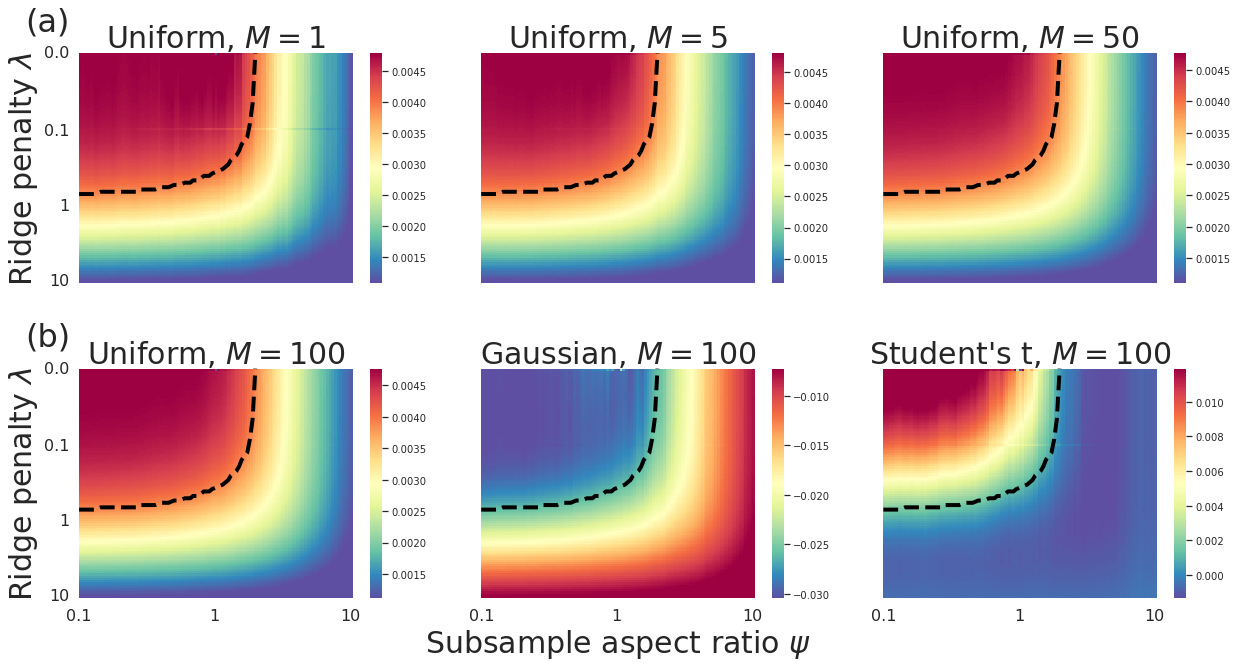

In [8]:
sns.set(font_scale=2.5)

fig, axes = plt.subplots(2,3,figsize=(18,10), sharex=True, sharey=True)
# cbar_ax = fig.add_axes([.91, .3, .03, .4])

i = 0
for j,M in enumerate([1, 5, 50]):
    _df = df[df['M']==M]
    _df = _df.pivot("lam", "phi_s", "mean")
    sns.heatmap(_df, cmap=sns.color_palette("Spectral_r", as_cmap=True), ax=axes[i,j],
               vmin=np.quantile(_df.values, 0.05), vmax=np.quantile(_df.values, 0.95))
    axes[i,j].set_title('Uniform, $M={}$'.format(M))
    axes[i,j].set_xlabel('')
    axes[i,j].figure.axes[-1].tick_params(labelsize=10)
    

i = 1
type_dict = {'mean':'Uniform, $M=100$','random_gau':'Gaussian, $M=100$','random_t':"Student's t, $M=100$"}
for j,type_str in enumerate(type_dict.keys()):
    
    _df = df[df['M']==100]
    _df = _df.pivot("lam", "phi_s", type_str)    
    sns.heatmap(_df, cmap=sns.color_palette("Spectral_r", as_cmap=True), ax=axes[i,j],
               vmin=np.quantile(_df.values, 0.05), vmax=np.quantile(_df.values, 0.95))
    
    axes[i,j].set_title(type_dict[type_str])
    axes[i,j].set_xlabel('')
    axes[i,j].set_xticks([])
    axes[i,j].set_xticks([], minor=True)
    phis = [0.1, 1., 10.]
    ticks = np.where(np.in1d(np.array(_df.columns), phis))[0]
    axes[i,j].set_xticks(ticks)
    axes[i,j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in phis], 
                              rotation=0, fontsize=16)
    axes[i,j].figure.axes[-1].tick_params(labelsize=10)
    
    
for i in range(2):
    for j in range(3):
        axes[i,j].plot(id_phis_list, id_lam_list, '--',
                color='black', lw=4, clip_on=False)
    
for i in range(2):
    lams = [0,  0.1, 1., 10.]
    ticks = np.where(np.in1d(np.array(_df.index), lams))[0]
    axes[i,0].set_yticks(ticks)
    axes[i,0].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], fontsize=16)
    for j in range(0,3):
        axes[i,j].set_ylabel('')
        
    axes[i,0].set_ylabel('Ridge penalty $\lambda$')
axes[1,1].set_xlabel('Subsample aspect ratio $\psi$')


axes[0,0].text(-20, -10., '(a)', fontsize=32)
axes[1,0].text(-20, -10., '(b)', fontsize=32)
fig.tight_layout()
plt.savefig('result/fig_heatmap_thm3.1.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

# Ex2

In [11]:
path_result = 'result/ex2/'
rho_ar1 = 0.5
df = pd.read_csv(path_result+'res_ar1rho_{:.02f}_{}.csv'.format(rho_ar1,0))

df = df.groupby(['phi','phi_s','lam','M']).mean().reset_index()
df = df[df['phi_s']!=np.inf]

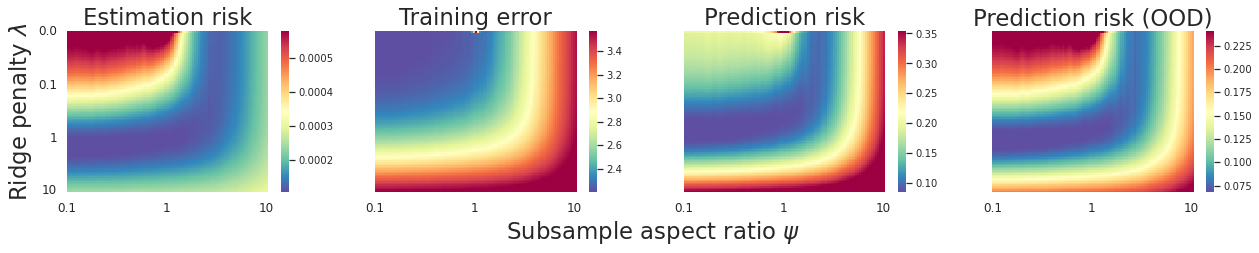

In [14]:
sns.set(font_scale=1.9)
fig, axes = plt.subplots(1,4,figsize=(18,4), sharex=True, sharey=True)
# cbar_ax = fig.add_axes([.91, .3, .03, .4])


type_dict = {'est_err':'Estimation risk',
             'train_err':'Training error',
             'pred_in':'Prediction risk',
             'pred_out':'Prediction risk (OOD)'}
for j,type_str in enumerate(type_dict.keys()):
    
    _df = df[df['M']==100]
    _df = _df.pivot("lam", "phi_s", type_str)    
    sns.heatmap(_df, cmap=sns.color_palette("Spectral_r", as_cmap=True), ax=axes[j],
               vmin=np.quantile(_df.values, 0.05), vmax=np.quantile(_df.values, 0.95))
    
    axes[j].set_title(type_dict[type_str])
    axes[j].set_xlabel('')
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    phis = [0.1, 1., 10.]
    ticks = np.where(np.in1d(np.array(_df.columns), phis))[0]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in phis], 
                            rotation=0, fontsize=12)
    axes[j].figure.axes[-1].tick_params(labelsize=10)
    

lams = [0,  0.1, 1., 10.]
ticks = np.where(np.in1d(np.array(_df.index), lams))[0]
axes[0].set_yticks(ticks)
axes[0].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], fontsize=12)
for j in range(4):
    axes[j].set_ylabel('')

axes[0].set_ylabel('Ridge penalty $\lambda$')
axes[1].set_xlabel('$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Subsample aspect ratio $\psi$')


fig.tight_layout()
plt.savefig('result/fig_heatmap_thm4.1.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

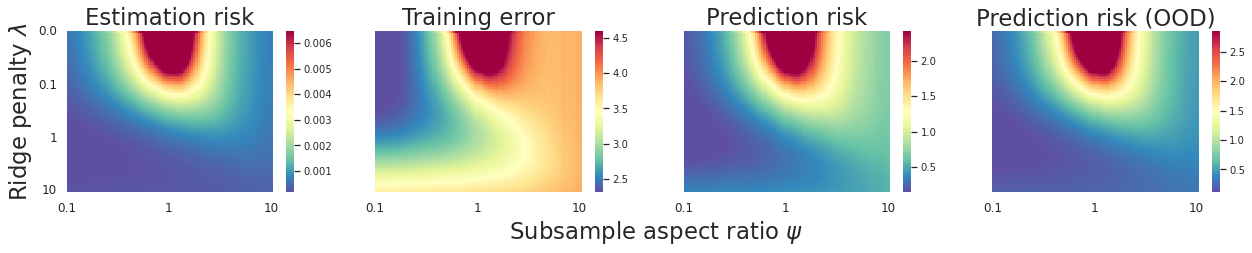

In [5]:
sns.set(font_scale=1.9)
fig, axes = plt.subplots(1,4,figsize=(18,4), sharex=True, sharey=True)
# cbar_ax = fig.add_axes([.91, .3, .03, .4])


type_dict = {'est_err':'Estimation risk',
             'train_err':'Training error',
             'pred_in':'Prediction risk',
             'pred_out':'Prediction risk (OOD)'}
for j,type_str in enumerate(type_dict.keys()):
    
    _df = df[df['M']==1]
    _df = _df.pivot("lam", "phi_s", type_str)    
    sns.heatmap(_df, cmap=sns.color_palette("Spectral_r", as_cmap=True), ax=axes[j],
               vmin=np.quantile(_df.values, 0.05), vmax=np.quantile(_df.values, 0.95))
    
    axes[j].set_title(type_dict[type_str])
    axes[j].set_xlabel('')
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    phis = [0.1, 1., 10.]
    ticks = np.where(np.in1d(np.array(_df.columns), phis))[0]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in phis], 
                            rotation=0, fontsize=12)
    axes[j].figure.axes[-1].tick_params(labelsize=10)
    

lams = [0,  0.1, 1., 10.]
ticks = np.where(np.in1d(np.array(_df.index), lams))[0]
axes[0].set_yticks(ticks)
axes[0].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], fontsize=12)
for j in range(4):
    axes[j].set_ylabel('')

axes[0].set_ylabel('Ridge penalty $\lambda$')
axes[1].set_xlabel('$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Subsample aspect ratio $\psi$')


fig.tight_layout()
# plt.savefig('result/fig_heatmap_thm4.1.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

In [6]:
n_simu = 50
sigma = 0.5
p = 500
M = 100
rho_ar1 = 0.5
phi = 0.1

np.random.seed(0)
Sigma, beta0, X, Y, _, _, rho2, sigma2 = generate_data(
    p, phi, rho_ar1, sigma, func='quad', n_test=1)

psi = 2.
lam = 1e-6
lam_bar = est_lam(X, psi, 'ridge', lam, M=100)
print(lam_bar, phi, psi)

# np.logspace(np.log(lam), np.log(lam_bar), 51)[::-1]
#(lam - lam_bar) * np.linspace(0,1,51) + lam_bar
phis_list = np.logspace(np.log10(phi), np.log10(psi), 51) # (psi - phi) *   + phi
lam_list = (lam - lam_bar) * (phis_list - phi) / (psi - phi) + lam_bar
id_lam_list = np.argmin(np.abs(lam_list[:, None] - df['lam'].unique()[None, :]), 1)
id_phis_list = np.argmin(np.abs(phis_list[:, None] - df['phi_s'].unique()[None, :]), 1)

0.6901931294785475 0.1 2.0


In [18]:
phis_list = df['phi_s'].unique()[id_phis_list]
lam_list = df['lam'].unique()[id_lam_list]

_df = df[df['lam'].isin(lam_list) & df['phi_s'].isin(phis_list)].copy()
_df = _df[_df['lam'].apply(lambda x:np.where(lam_list==x)[0][0]) == _df['phi_s'].apply(lambda x:np.where(phis_list==x)[0][0])]

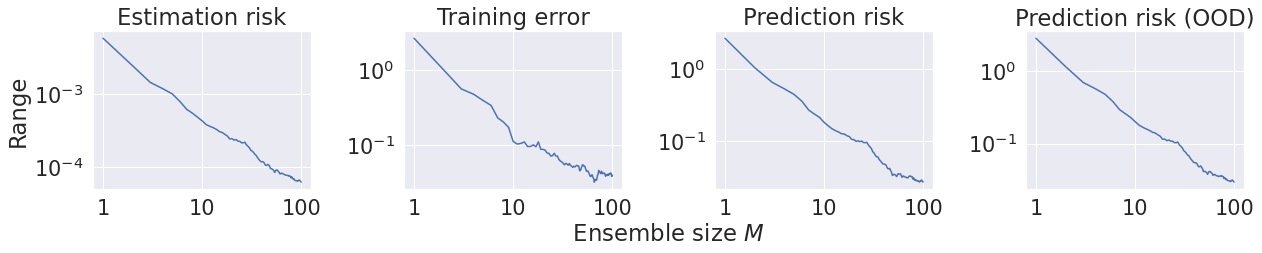

In [38]:
fig, axes = plt.subplots(1,4,figsize=(18,4), sharex=True)

type_dict = {'est_err':'Estimation risk',
             'train_err':'Training error',
             'pred_in':'Prediction risk',
             'pred_out':'Prediction risk (OOD)'}
for j,type_str in enumerate(type_dict.keys()):
    axes[j].plot((_df.groupby('M').max() - _df.groupby('M').min())[type_str])
    axes[j].set_xscale('log')
    axes[j].set_yscale('log')
    
    axes[j].set_title(type_dict[type_str])
    axes[j].set_xlabel('')
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    
lams = [1., 10., 100]
axes[j].set_xticks(lams)
axes[j].set_xticklabels([f"{x:.0f}" for x in lams ])
axes[0].set_ylabel('Range')
axes[1].set_xlabel('$\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Ensemble size $M$')


fig.tight_layout()
plt.savefig('result/fig_heatmap_thm4.1_M.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

# Ex3

In [2]:
path_result = 'result/ex3/'
df = pd.DataFrame()
for ilam in range(4):
    _df = pd.read_csv('{}res_{}.csv'.format(path_result,ilam))
    _df['path'] = ilam
    df = pd.concat([df,_df])

metric = ['mean','random_gau','random_t','train_est_err','train_pred_err','test_est_err','test_pred_err']

df = pd.melt(df, id_vars=['path','phi_s','lam'], value_vars=metric)

mean = np.repeat(
    df[df['path']==0].groupby('variable').transform('mean')['value'], 4).reset_index(drop=True)
scale = np.repeat(
    df[df['path']==3].groupby('variable').transform('mean')['value'].reset_index(drop=True) -
    df[df['path']==0].groupby('variable').transform('mean')['value'].reset_index(drop=True), 4).reset_index(drop=True)
df['value'] = (df['value']-mean)/scale

df = df[~(df['variable']=='test_est_err')]

metric_name = [
    'Uniform\n','Gaussian\n',"Student's $t$\n",
    'Estimation risk\n','Prediction risk\n',
    'Estimation risk\n(test)',
    'Prediction risk\n(OOD)'
]

df['variable'] = df['variable'].map({i:j for (i,j) in zip(metric,metric_name)})

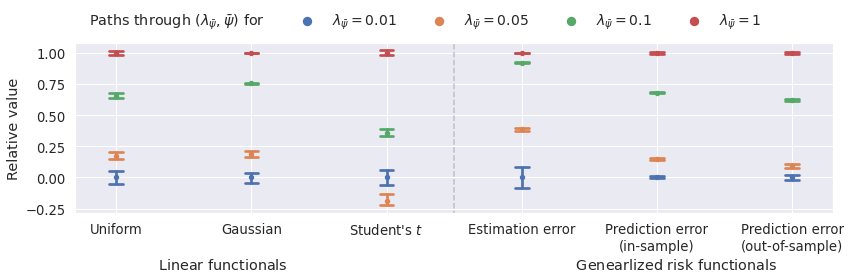

In [15]:
import seaborn as sns
sns.set(font_scale=1.2)
fig, ax = plt.subplots(1,1,figsize=(12,4))
sns.pointplot(df, x='variable', y='value', hue='path', ax=ax, 
              markers='.', linestyles='', capsize=.1)
ylim = ax.get_ylim()
ax.vlines(2.5,-2,2,color='silver', linestyles='--')
ax.set_ylim(ylim)
# sns.pointplot(df, x='path', y='train_pred_err', ax=ax)
# sns.pointplot(df, x='path', y='test_est_err', ax=ax)
# sns.pointplot(df, x='path', y='test_pred_err', ax=ax)
lines_labels = [ax.get_legend_handles_labels() for ax in [ax]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend = fig.legend(title='Paths through $(\lambda_{\\bar{\psi}},\\bar{\psi})$ for', handles=handles, labels=[
    '$\lambda_{\\bar{\psi}}=0.01$','$\lambda_{\\bar{\psi}}=0.05$', '$\lambda_{\\bar{\psi}}=0.1$', '$\lambda_{\\bar{\psi}}=1$'
    
], loc=9, ncol=10, frameon=False, fontsize=14)

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()
legend_title_left(legend)
ax.get_legend().remove()

for item, label in zip(legend.legendHandles, legend.texts):
    item.set_linewidth(6)
    label.set_ha('left')
    
plt.ylabel('Relative value')
# plt.xticks(rotation=15)
plt.xlabel('$\qquad$Linear functionals$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$  Genearlized risk functionals')
fig.tight_layout()

ax.set_yticks(np.linspace(0,1,5), minor=True)
ax.grid(b=True, which='major')
# ax.grid(b=True, which='minor')
fig.subplots_adjust(top=0.85)
plt.savefig('result/fig_cifar10.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

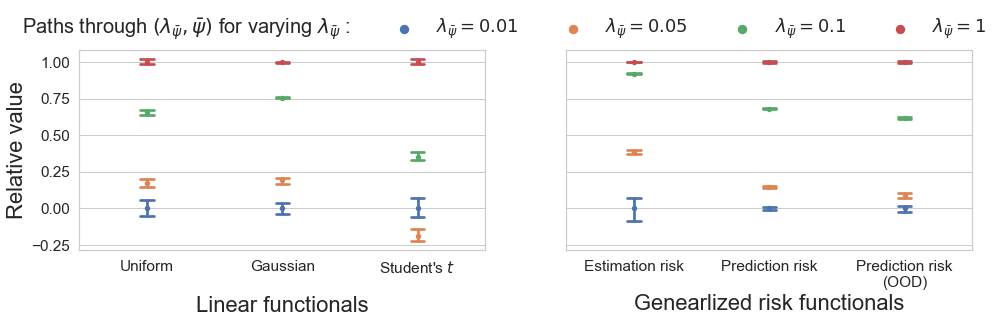

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.4)
fig, axes = plt.subplots(1,2,figsize=(16,4), sharey=True)
sns.pointplot(df[df['variable'].isin(['Uniform\n','Gaussian\n',"Student's $t$\n"])], 
              x='variable', y='value', hue='path', ax=axes[0], 
              markers='.', linestyles='', capsize=.1)

sns.pointplot(df[~df['variable'].isin(['Uniform\n','Gaussian\n',"Student's $t$\n"])], 
              x='variable', y='value', hue='path', ax=axes[1], 
              markers='.', linestyles='', capsize=.1)

# ylim = axes[0].get_ylim()
# axes[0].vlines(2.5,-2,2,color='silver', linestyles='--')
# axes[0].set_ylim(ylim)
# sns.pointplot(df, x='path', y='train_pred_err', ax=ax)
# sns.pointplot(df, x='path', y='test_est_err', ax=ax)
# sns.pointplot(df, x='path', y='test_pred_err', ax=ax)
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend = fig.legend(title='Paths through $(\lambda_{\\bar{\psi}},\\bar{\psi})$ for varying $\lambda_{\\bar{\psi}}$ :', handles=handles, labels=[
    '$\lambda_{\\bar{\psi}}=0.01$','$\lambda_{\\bar{\psi}}=0.05$', '$\lambda_{\\bar{\psi}}=0.1$', '$\lambda_{\\bar{\psi}}=1$'
    
], loc=9, ncol=10, frameon=False, fontsize=18, title_fontsize=20)

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()
legend_title_left(legend)
for j in range(2):
    axes[j].get_legend().remove()

for item, label in zip(legend.legendHandles, legend.texts):
    item.set_linewidth(6)
    label.set_ha('left')
    
axes[0].set_ylabel('Relative value', fontsize=22)
axes[1].set_ylabel('')
# plt.xticks(rotation=15)
axes[0].set_xlabel('Linear functionals', fontsize=22)
axes[1].set_xlabel('Genearlized risk functionals', fontsize=22)
# fig.tight_layout()

axes[0].set_yticks(np.linspace(0,1,5), minor=True)
fig.subplots_adjust(top=0.82)
plt.savefig('result/fig_cifar10.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

# Ex4

In [11]:
data_set_list = ['cifar10', 'mnist', 'usps']
path_result = 'result/ex4/'

df = pd.DataFrame()
for i, dataset in enumerate(data_set_list):
    for psi in range(2,12,2):
        _df = pd.read_csv('{}res_{}_{}.csv'.format(path_result,dataset,psi))
        _df['psi'] = psi
        _df['Dataset'] = np.char.upper(dataset)
        df = pd.concat([df,_df])

df['Model'] = np.where(df['lam']==1e-3, '$(0,\\bar{\psi})$', '$(\\bar{\lambda},\phi)$')

['Dataset', 'CIFAR10', 'MNIST', 'USPS', 'Model', '$(\\bar{\\lambda},\\phi)$', '$(0,\\bar{\\psi})$']


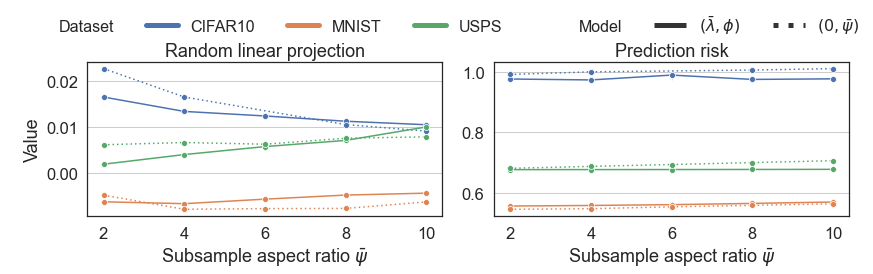

In [18]:
import seaborn as sns
sns.set_theme(style="white", font_scale=1.5)
fig, axes = plt.subplots(1,2,figsize=(12,4), sharey=False)

sns.lineplot(
    df, x='psi', y='random_gau', hue='Dataset', 
    style='Model', dashes=[(1,0),(1,2)], marker='o', ax=axes[0]
)
sns.lineplot(
    df, x='psi', y='test_pred_err', hue='Dataset', 
    style='Model', dashes=[(1,0),(1,2)], marker='o', ax=axes[1]
)
for i in range(2):
    axes[i].set_xticks(np.arange(2,12,2))
    axes[i].set_xlabel('Subsample aspect ratio $\\bar{\psi}$')
axes[0].set_ylabel('Value')
axes[1].set_ylabel('')
axes[0].set_title('Random linear projection')
axes[1].set_title('Prediction risk')

import matplotlib
lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
print(labels)
for j in range(2):
    axes[j].get_legend().remove()
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='', frameon=False, fontsize=16)

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()
legend_title_left(legend)

for item, label in zip(legend.legendHandles, legend.texts):
    item.set_linewidth(5)
    label.set_ha('left')
    
    
for j in range(2):
    axes[j].grid(visible=True, axis='y', which='major')

fig.tight_layout()
fig.subplots_adjust(top=0.78)
plt.savefig('result/fig_realdata.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

# Ex5 random features

In [74]:
func_list = ['sigmoid' ,'tanh', 'relu']
path_result = 'result/ex5/'

df = pd.DataFrame()
i = 0

for func_name in func_list:
    for j in range(101):        
        _df = pd.read_csv('{}res_{}_{}_{}.csv'.format(
            path_result, func_name, i, j))
        _df['func'] = func_name
        df = pd.concat([df,_df])

df = df[df['phi_s']!=np.inf]    

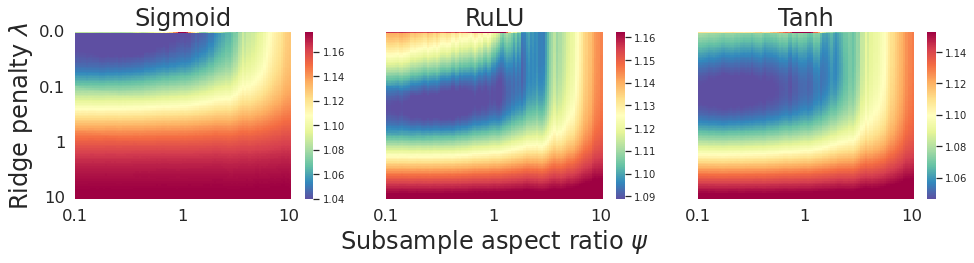

In [79]:
sns.set(font_scale=1.5)

fig, axes = plt.subplots(1,3,figsize=(14,4), sharex=True, sharey=True)
# cbar_ax = fig.add_axes([.91, .3, .03, .4])


type_dict = {'sigmoid':'Sigmoid',
             'relu':'RuLU',
             'tanh':'Tanh'}
for j,type_str in enumerate(type_dict.keys()):
    
    _df = df[(df['func']==type_str)&(df['seed']==0)]
    _df = _df.pivot("lam", "phi_s", "risk")    
    sns.heatmap(_df, cmap=sns.color_palette("Spectral_r", as_cmap=True), ax=axes[j],
               vmin=np.quantile(_df.values, 0.05), vmax=np.quantile(_df.values, 0.95))
    
    axes[j].set_title(type_dict[type_str], fontsize=24)
    axes[j].set_xlabel('')
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    phis = [0.1, 1., 10.]
    ticks = np.where(np.in1d(np.array(_df.columns), phis))[0]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in phis], rotation=0)
    axes[j].figure.axes[-1].tick_params(labelsize=10)
    

lams = [0,  0.1, 1., 10.]
ticks = np.where(np.in1d(np.array(_df.index), lams))[0]
axes[0].set_yticks(ticks)
axes[0].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ])
for j in range(3):
    axes[j].set_ylabel('')

axes[0].set_ylabel('Ridge penalty $\lambda$', fontsize=24)
axes[1].set_xlabel('Subsample aspect ratio $\psi$', fontsize=24)


fig.tight_layout()
plt.savefig('result/fig_heatmap_rf.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

# Ex6 kernel

In [80]:
func_list = ['poly-3' , 'rbf', 'laplacian']
path_result = 'result/ex6/'

df = pd.DataFrame()
i = 0

for func_name in func_list:
    for j in range(101):
        filename = '{}res_{}_{}_{}.csv'.format(
            path_result, func_name, i, j)
        if not os.path.exists(filename):
            print(filename)
            continue
        _df = pd.read_csv(filename)
        _df['func'] = func_name
        df = pd.concat([df,_df])

df = df[df['phi_s']!=np.inf]    

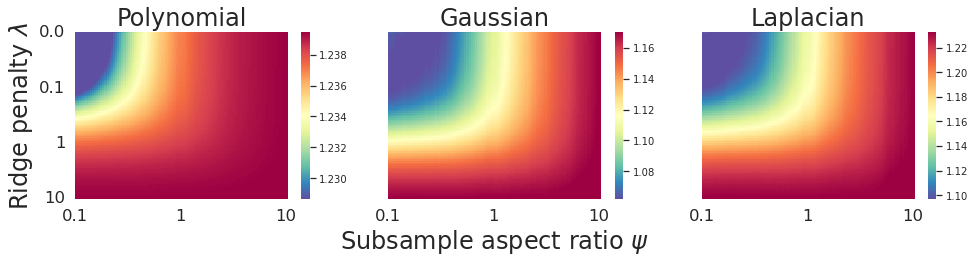

In [82]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(1,3,figsize=(14,4), sharex=True, sharey=True)


type_dict = {'poly-3':'Polynomial' ,
             'rbf':'Gaussian', 
             'laplacian':'Laplacian'
            }
for j,type_str in enumerate(type_dict.keys()):
    
    _df = df[(df['func']==type_str)&(df['seed']==0)].reset_index(drop=True)
    _df = _df.pivot("lam", "phi_s", "risk")    
    sns.heatmap(_df, cmap=sns.color_palette("Spectral_r", as_cmap=True), ax=axes[j],
               vmin=np.quantile(_df.values, 0.05), 
                vmax=np.quantile(_df.values, 0.95))
    
    axes[j].set_title(type_dict[type_str], fontsize=24)
    axes[j].set_xlabel('')
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    phis = [0.1, 1., 10.]
    ticks = np.where(np.in1d(np.array(_df.columns), phis))[0]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in phis], rotation=0)
    axes[j].figure.axes[-1].tick_params(labelsize=10)
    
    if j==0:
        lams = [0,  0.1, 1., 10.]
        yticks = np.where(np.in1d(np.array(_df.index), lams))[0]

axes[0].set_yticks(yticks)
axes[0].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ])
for j in range(3):
    axes[j].set_ylabel('')

axes[0].set_ylabel('Ridge penalty $\lambda$', fontsize=24)
axes[1].set_xlabel('Subsample aspect ratio $\psi$', fontsize=24)


fig.tight_layout()
plt.savefig('result/fig_heatmap_kernel.pdf', bbox_inches='tight', pad_inches=0, dpi=300)